In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

ds1 = 'Data Analysis page 1.csv'
df1 = pd.read_csv(ds1,encoding='ISO-8859-1')
ds2 = 'Data Analysis page 2.csv'
df2 = pd.read_csv(ds2,encoding='ISO-8859-1')


In [11]:
df1

,Unnamed: 0,Unnamed: 1,2014,2014.1,2014.2,2014.3,2015,2015.1,2015.2,2015.3,...,2016.2,2016.3,2017,2017.1,2017.2,2017.3,2018,2018.1,2018.2,2018.3
0,NaN,NaN,Full-Time,Full-Time,Part-Time,Part-Time,Full-Time,Full-Time,Part-Time,Part-Time,...,Part-Time,Part-Time,Full-Time,Full-Time,Part-Time,Part-Time,Full-Time,Full-Time,Part-Time,Part-Time
1,Cluster,Agency,Male,Female,Male,Female,Male,Female,Male,Female,...,Male,Female,Male,Female,Male,Female,Male,Female,Male,Female
2,Education,Education Agency 1,107,180,8,48,105,176,6,38,...,7,38,109,246,6,36,123,247,7,33
3,Education,Education Agency 2,"2,797","2,463","1,691",764,"2,115","1,767","1,670",620,...,"1,724",665,"2,154","2,225","1,712",746,"2,294","2,666","1,687",764
4,Education,Education Agency 3,6,32,"1,163","18,410",14,40,"1,250","18,852",...,"1,377","19,727",24,33,"2,211","19,415",6,13,"2,501","19,110"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Treasury,Treasury Agency 2,272,578,5,5,295,400,14,182,...,10,169,19,15,5,6,18,21,6,6
93,Treasury,Treasury Agency 3,249,258,6,41,255,289,6,44,...,6,43,270,284,6,42,278,274,6,49
94,NaN,Total,"123,614","156,793","13,995","87,983","118,504","152,038","14,302","89,943",...,"14,678","88,264","114,962","155,408","18,706","90,721","111,377","155,833","22,034","90,216"
95,NaN,NaN,NaN,"280,407",NaN,"101,978",NaN,"270,542",NaN,"104,245",...,NaN,"102,942",NaN,"270,370",NaN,"109,427",NaN,"267,210",NaN,"112,250"


In [12]:
df2

,Cluster,Agency,Year,PT/FT,Gender,Headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,"2,463"
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,"39,251"
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,"9,817"
...,...,...,...,...,...,...
1835,Transport,Transport Agency 5,2018,Part-Time,Male,"1,354"
1836,Transport,Transport Agency 6,2018,Part-Time,Male,579
1837,Treasury,Treasury Agency 1,2018,Part-Time,Male,6
1838,Treasury,Treasury Agency 2,2018,Part-Time,Male,6


In [19]:
df1.describe()

,Unnamed: 0,Unnamed: 1,2014,2014.1,2014.2,2014.3,2015,2015.1,2015.2,2015.3,...,2016.2,2016.3,2017,2017.1,2017.2,2017.3,2018,2018.1,2018.2,2018.3
count,93,94,95,96,95,97,95,96,95,97,...,95,97,95,96,95,97,95,96,95,97
unique,11,94,89,89,53,77,89,88,54,82,...,54,78,88,92,52,78,86,90,53,76
top,Health,Agency,6,81,6,6,19,29,6,6,...,6,6,69,118,6,6,27,30,6,6
freq,33,1,3,2,26,7,3,2,28,5,...,23,7,2,2,25,9,3,3,27,6


In [14]:
df2.describe()

,Year
count,1840.000000
mean,2016.000000
std,1.414598
min,2014.000000
25%,2015.000000
50%,2016.000000
75%,2017.000000
max,2018.000000


In [20]:
#Clean data
df1.isna().sum().sum()
df1.isnull().sum().sum()
df1.duplicated().sum().sum()

0

In [21]:
#Clean data
df2.isna().sum().sum()
df2.isnull().sum().sum()
df2.duplicated().sum().sum()

0

In [17]:
#Encode
enc = OrdinalEncoder()
dfEncode = df2
#Encode Gender
dfEncode = pd.get_dummies(data = dfEncode, columns = ['Gender','PT/FT'])
dfEncode = dfEncode.join(df2['Gender'])
dfEncode['Gender_Female'] = enc.fit_transform(dfEncode[['Gender_Female']])
dfEncode['Gender_Male'] = enc.fit_transform(dfEncode[['Gender_Male']])


#Encode PT/FT
dfEncode= dfEncode.join(df2['PT/FT'])
dfEncode['PT/FT'] = enc.fit_transform(dfEncode[['PT/FT']])
dfEncode['PT/FT_Full-Time'] = enc.fit_transform(dfEncode[['PT/FT_Full-Time']])
dfEncode['PT/FT_Part-Time'] = enc.fit_transform(dfEncode[['PT/FT_Part-Time']])
dfEncode

,Cluster,Agency,Year,Headcount,Gender_Female,Gender_Male,PT/FT_Full-Time,PT/FT_Part-Time,Gender,PT/FT
0,Education,Education Agency 1,2014,180,1.0,0.0,1.0,0.0,Female,0.0
1,Education,Education Agency 2,2014,"2,463",1.0,0.0,1.0,0.0,Female,0.0
2,Education,Education Agency 3,2014,32,1.0,0.0,1.0,0.0,Female,0.0
3,Education,Education Agency 4,2014,"39,251",1.0,0.0,1.0,0.0,Female,0.0
4,Family & Community Services,Family & Community Services Agency 1,2014,"9,817",1.0,0.0,1.0,0.0,Female,0.0
...,...,...,...,...,...,...,...,...,...,...
1835,Transport,Transport Agency 5,2018,"1,354",0.0,1.0,0.0,1.0,Male,1.0
1836,Transport,Transport Agency 6,2018,579,0.0,1.0,0.0,1.0,Male,1.0
1837,Treasury,Treasury Agency 1,2018,6,0.0,1.0,0.0,1.0,Male,1.0
1838,Treasury,Treasury Agency 2,2018,6,0.0,1.0,0.0,1.0,Male,1.0


<Axes: xlabel='Year', ylabel='PT/FT_Full-Time'>

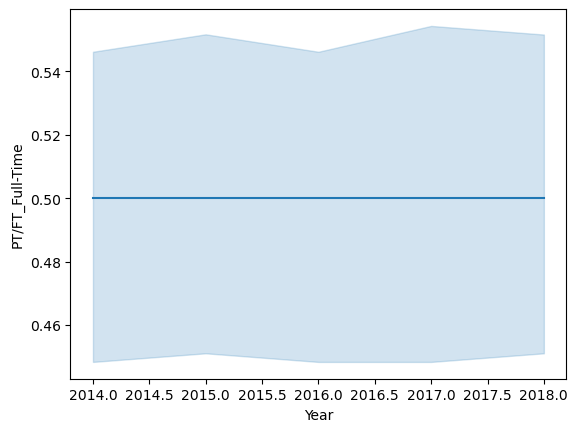

In [23]:
# plt.figure(figsize=(20,4))
sns.lineplot(data = dfEncode, x='Year', y= 'PT/FT_Full-Time')